In [2]:
import networkx as nx
import pickle
import matplotlib.pyplot as plt
from sklearn import cluster
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score

In [3]:
## import network
G = pickle.load(open('data/cleaned_network.p', 'rb'))


In [3]:
def graph_to_edge_matrix(G):
    """Convert a networkx graph into an edge matrix.
    See https://www.wikiwand.com/en/Incidence_matrix for a good explanation on edge matrices

    Parameters
    ----------
    G : networkx graph
    """
    # Initialize edge matrix with zeros
    graph_dict = dict()
    graph_dict['nodes'] = G.nodes
    for node in G.nodes:
        graph_dict[node] = []

    # Loop to set 0 or 1 (diagonal elements are set to 1)
    for node_1 in graph_dict['nodes']:
        for node_2 in graph_dict['nodes']:
            if (node_2 in G.neighbors(node_1)) or (node_1 == node_2):
                graph_dict[node_1].append(1)
            else:
                graph_dict[node_1].append(0)

    return graph_dict

In [4]:
df = graph_to_edge_matrix(G)
df = pd.DataFrame.from_dict(df)
df.set_index('nodes', inplace=True)
pickle.dump(df, open( "data/edge_matrix.p", "wb" ) )

In [5]:
edge_mat = df.to_numpy()

In [6]:
edge_mat

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [7]:
len(G.nodes)

4145

In [8]:
k_clusters = 400
model = cluster.KMeans(n_clusters=k_clusters, n_init=10).fit(edge_mat)

In [9]:
results = model.labels_

In [12]:
model.cluster_centers_

array([[-1.08420217e-19, -1.08420217e-19,  0.00000000e+00, ...,
        -1.08420217e-19, -1.08420217e-19, -1.08420217e-19],
       [ 1.08420217e-19,  1.08420217e-19,  0.00000000e+00, ...,
         1.08420217e-19,  1.08420217e-19,  1.08420217e-19],
       [ 0.00000000e+00,  0.00000000e+00,  1.08420217e-19, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.08420217e-19,  1.08420217e-19,  0.00000000e+00, ...,
         1.08420217e-19,  1.08420217e-19,  1.08420217e-19],
       [-1.08420217e-19, -1.08420217e-19,  0.00000000e+00, ...,
        -1.08420217e-19, -1.08420217e-19, -1.08420217e-19],
       [ 0.00000000e+00,  0.00000000e+00, -2.16840434e-19, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [4]:
# extract position for drawing purposes
pos_dict = {}
for node in G.nodes:
    pos_dict[node] = (G.nodes[node]['X'],G.nodes[node]['Y'])

#extract data
df_links = nx.to_pandas_edgelist(G)
df_nodes = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')

In [19]:
df_links.Code.unique()

array(['IV', 'I', 'VI_A', 'VI_C', 'V_A', 'VI_B', '_0', 'II', 'III', 'V_B',
       nan], dtype=object)

In [20]:
nodes_1 = list(df_links.loc[df_links.Code != '_0'].source)+list(df_links.loc[df_links.Code != '_0'].target)
nodes_2

In [9]:
H = G.subgraph(nodes)

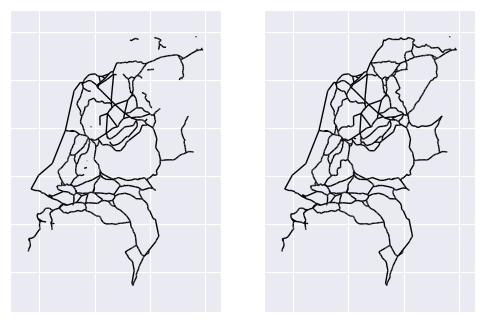

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2, dpi=100)
nx.draw_networkx_edges(H, pos_dict, ax=ax1)
nx.draw_networkx_edges(G, pos_dict, ax=ax2)